## Entropy
Entropy measures the uncertainty associated with a probability distribution. If all values are more or less equally probable, the entropy is higher because we cannot predict the output of the system with certainty. On the other hand, if some items are much more probable than others, we can predict them with relative certainty. Such a system has low entropy. 

Let us see this for Gaussian distributions. The entropy of a Gaussian is directly related to its standard deviation $\sigma$. The higher the $\sigma$, the wider the Gaussian and thus higher the entropy. Gaussians with lower $\sigma$ are more peaked and have lesser entropy. The entropy can be computed using the following formula.

$$ H(X) = \frac{1}{2} \log(2 \pi e \sigma^2) $$

We will now see this in PyTorch. Refer Section 6.2 of the book for more details.

In [1]:
import torch
import math
import matplotlib.pyplot as plt
import numpy as np
from torch.distributions import Normal

In [2]:
def entropy_gaussian_formula(sigma):
    return 0.5 * torch.log(2 * math.pi * math.e * sigma * sigma)

In [3]:
p = Normal(0, 10)

# Compute entropy using the formula defined above
H_formula = entropy_gaussian_formula(p.stddev)

# Compute entropy using the PyTorch function call
H = p.entropy()

assert torch.isclose(H_formula, H)

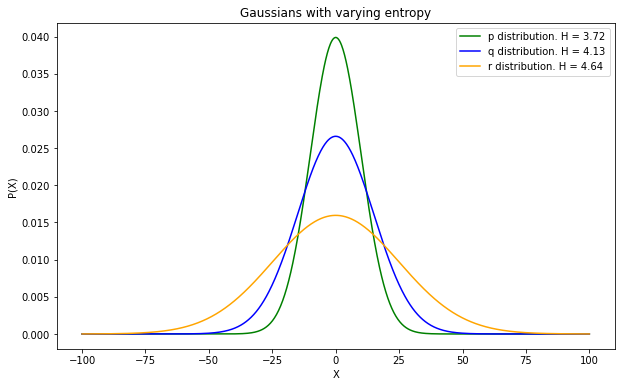

In [4]:
def entropy_plot(p, q, r):
    x = np.linspace(-100, 100, 1000)
    p_pdf = p.log_prob(torch.from_numpy(x)).exp()
    q_pdf = q.log_prob(torch.from_numpy(x)).exp()
    r_pdf = r.log_prob(torch.from_numpy(x)).exp()

    p_entropy = p.entropy()
    q_entropy = q.entropy()
    r_entropy = r.entropy()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title("Gaussians with varying entropy")
    ax.set_ylabel("P(X)")
    ax.set_xlabel("X")
    ax.plot(x, p_pdf, 'green', label="p distribution. H = {:.2f}".format(p_entropy))
    ax.plot(x, q_pdf, 'blue', label="q distribution. H = {:.2f}".format(q_entropy))
    ax.plot(x, r_pdf, 'orange', label="r distribution. H = {:.2f}".format(r_entropy))
    ax.legend()

# Instantiate two more Gaussians with higher variance
q = Normal(0, 15)
r = Normal(0, 25)

entropy_plot(p, q, r)